# Introduction
Convolutional neural networks (CNNs) are a variant of traditional neural networks specially designed for spatial data with a vastly reduced number of parameters.

# Intuition
In 1959, Hubel & Wiesel found that neurons in the cerebral cortex of a cat responded to "edges", lines presented in certain locations or orientations. This was discovered after they had difficulty in detecting responses from neurons to traditional visual stimuli, such as dots.

Similarly, we can design neural networks which detect and process edges.


[[4]](#4)

## What's An Edge?
Edges can be defined as a discontinuity in the gradient of image intensity.

<div>
<img src="https://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/MARSHALL/edge_types.gif" width="500"/>
</div>

Such discontinuities can be detected by observing the gradient. For example, the gradient of (a) would be some $x>0$ before instantly changing to $-x$. At this jump discontinuity, we observe an edge.

To detect vertical edges, we would compute the derivative of the image with respect to $x$. Using the centered difference technique for numerical differentiation: $\frac{\partial F(x,y)}{\partial x}\approx\frac{F(x+1,y)-F(x-1,y)}{2}$.

Note that we are not actually numerically computing points of discontinuity in the gradient. Such a task is nontrivial. Rather, we compute the gradients over an image and expect the neural network to be able to "intuit" the discontinuities in gradient just as we are able to "intuit" discontinuities in graphs by observation.

[[2]](#2)

## Image Filters and Sobel Operator
In an image, we can estimate the horizontal and vertical gradient at some position using something similar to the center-difference operator applied as an image filter.

If we take the estimated horizontal gradient at a point in an image to be the sum of the three points on its right minus the sum of the three points on its left and do something similar for the vertical gradient estimator, we get:
$$
\begin{bmatrix}
-1&0&1\\
-1&0&1\\
-1&0&1
\end{bmatrix},
\begin{bmatrix}
-1&-1&-1\\
0&0&0\\
1&1&1
\end{bmatrix}
$$


To clarify, the application of an image filter essentially performs dot products between the filters and local regions of the input. The process is visualized below. Another animation is in [[3]](#3).
<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/9/90/CNN-filter-animation-1.gif" width="500"/>
</div>

Perhaps it would make sense to put a greater weight on the points to the immediate left and right of our target point. The Sobel operator does just this. The horizontal and vertical Sobel filters look something like:
$$
\begin{bmatrix}
-1&0&1\\
-2&0&2\\
-1&0&1
\end{bmatrix},
\begin{bmatrix}
-1&-2&-1\\
0&0&0\\
1&2&1
\end{bmatrix}
$$

You may see the Sobel operator with flipped signs. Ultimately, the magnitude of the gradient is what matters, and the order of the signs are just a technicality.

### Example
Here is an example of applying the horizontal edge image filter.


[[1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]]


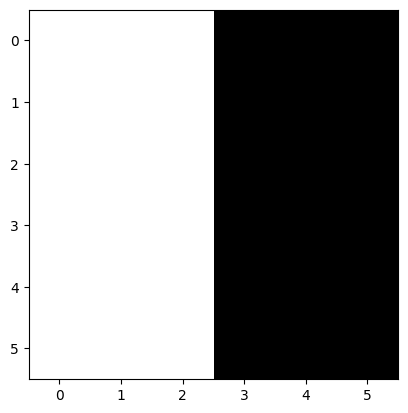

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

image = np.array([
    [1, 1, 1, 0, 0, 0]
]*6)

print(image)

plt.imshow(image, cmap=mpl.colormaps['gray'])
plt.show()

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


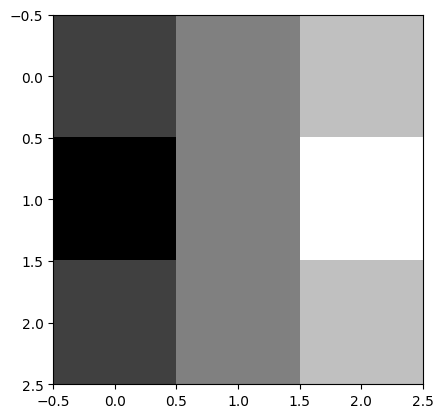

In [ ]:
filter = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

print(filter)

plt.imshow(filter, cmap=mpl.colormaps['gray'])
plt.show()

SciPy includes a function to apply image filters.

[[0 0 4 4 0 0]
 [0 0 4 4 0 0]
 [0 0 4 4 0 0]
 [0 0 4 4 0 0]
 [0 0 4 4 0 0]
 [0 0 4 4 0 0]]


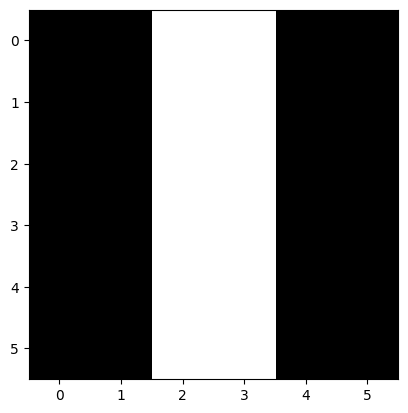

In [ ]:
from scipy import ndimage

result = ndimage.correlate(image, filter)
result = np.abs(result)

print(result)

plt.imshow(result, cmap=mpl.colormaps['gray'])
plt.show()

Using the horizontal Sobel filter, we were able to detect a vertical edge!

Perhaps we can feed these representations of edges into a neural network, rather than the image itself, providing the network with refined data to work with.

[[2]](#2), [[3]](#3), [[5]](#5), [[6]](#6)

## Terminology Clarification
What we have seen as the application of a filter onto an image is known as cross-correlation. As we will see soon, this cross-correlation operation is part of the essence of CNNs.

Similarly, there exists the convolution operation. The difference between the two is slight: in a convolution the filter (kernel) is flipped over both axes before being applied to the image. Mathematically, convolutions have nicer properties. Computationally, the flipping of the filter is unnecessary.

Thus, the name of convolutional neural networks is a slight misnomer. However, the operation is referred to as a convolution by convention. Moving forwards, we will also follow this convention.

(Hence, we used `scipy.ndimage.correlate` instead of `scipy.ndimage.convolve` above)

[[7]](#7)

## Application to Neural Networks
Using the Sobel operators, we can identify edges in the horizontal and vertical directions. However, how do we know if these edges extract the best representation of the image, rather than edges in some other direction?

We could hand-craft and test different filters. Or, we can use neural networks to learn the best filters, making the weights of filters parameters that the network can learn.

$$
\begin{bmatrix}
w_1&w_2&w_3\\
w_4&w_5&w_6\\
w_7&w_8&w_9
\end{bmatrix}
$$

# Convolutions in Neural Networks
Convolutions in neural networks are applied using convolution (conv) layers. A conv layer accepts a volume (image) of size $W_\text{in}\times H_\text{in}\times C_\text{in}$ and produces a volume of size $W_\text{out}\times H_\text{out}\times C_\text{out}$, where
$$
W_\text{out}=\lfloor\frac{W_\text{in}+2p-F}{S}\rfloor+1\\
H_\text{out}=\lfloor\frac{H_\text{in}+2p-F}{S}\rfloor+1\\
C_\text{out}=K
$$
and $\lfloor x\rfloor$ is the floor function.

If the filter is not contained within the image for some stride, the next step is taken without applying the filter. Others (e.g. [[3]](#3)) may consider a decimal quotient (without the floor) in width or height to be invalid for that reason.

A visualization of the application of a conv layer is given in [[3]](#3). A snapshot of the visualization is given below.
<div>
<img src="https://g-2aaf39.eeb47.a567.data.globus.org/stanford%20conv%20vis.png" width="700"/>
</div>

[[2]](#2), [[3]](#3)

## Hyperparameters
A conv layer has four hyperparameters:
- $K$, the number of filters
- $F$, the spatial extent
- $S$, the stride
- $P$, the amount of padding


### Number of Filters
Each filter has $C_\text{in}$ channels which convolves each of the $C_\text{in}$ input channels and takes their sum with a bias parameter to produce one output channel.

The input has $K$ filters applied to it, producing $K$ output channels.


### Spatial Extent
The spatial extent of a filter refers to its size.


### Stride
Stride refers to the number of elements the filter moves.
<div>
<img src="https://miro.medium.com/v2/resize:fit:1000/format:webp/1*34_365CJB5seboQDUrbI5A.gif" width="500"/>
</div>



### Padding
Padding refers to the additional space added around the image to be convolved. This additional space is typically filled in with zeros, though there are other strategies.
<div>
<img src="https://miro.medium.com/v2/resize:fit:1000/format:webp/1*gXAcHnbTxmPb8KjSryki-g.gif" width="500"/>
</div>

[[1]](#1), [[3]](#3)

## Number of Parameters of Conv Layer
Each filter has $F^2\cdot C_\text{in}$ weights. For $K$ filters, there are $K\cdot F^2\cdot C_\text{in}$ weights.

There is also one bias for each filter, resulting in $K$ biases.

In total, one conv layer has $K\cdot F^2\cdot C_\text{in}+K$ parameters.

### Contrast with Parameters of Fully-Connected Layer
Consider feeding images of size $n\times n$ with $C_\text{in}$ channels into a traditional neural network. A single fully-connected neuron in the first layer of the network would require $C_\text{in}\cdot n^2$ weight parameters. Thus, the space required for the weights will increase rapidly as $n$ increases, and this is just for one hidden neuron. For example, for $n=256,c=3$, $3*256^2=196,608$ weights are required for each hidden neuron.

Contrast this with the $K\cdot F^2\cdot C_\text{in}$ weights required for a conv layer. By inspection, one can see that there are far fewer parameters than that of a fully-connected layer.

The large number of parameters of a fully-connected layer may be wasteful and could lead to overfitting.

[[2]](#2)

## Local Connectivity
The comparatively sparse connections of conv layers are because each neuron is connected only to a local region of the input volume, rather than all of the input volume.

The spatial extent of this connectivity is called the **receptive field** of the neuron.

The receptive field of a neuron in the layer immediately preceding it is simply the filter size. However, the receptive field of a neuron increases with the number of layers that precede it.

<div>
<img src="https://miro.medium.com/v2/resize:fit:1200/1*k97NVvlMkRXau-uItlq5Gw.png" width="500"/>
</div>
For a filter with $F=3$, the receptive field of a neuron is $3\times3$ in the layer before it and $5\times5$ in the layer before that one.

[[2]](#2), [[3]](#3)



## Parameter Sharing
As our CNN learns, the filters of each conv layer can be imagined as "feature detectors" that can extract the same feature (e.g. a vertical edge) from any part of the image. Thus, the parameters of a filter are used across the entire input rather than just a part of it.

[[2]](#2), [[3]](#3)

## Vectorization of Convolution Layer
We've seen how to manually convolve an image using a conv layer made up of filters made up of channels. This operation was similar to a dot product between the filters and the local regions of the input. A common implementation of conv layers take advantage of this fact to formulate the forward pass of a conv layer to a single matrix multiplication:
1. A matrix representation of the input is formed. Each local region, of size $F\times F\times C_\text{in}$, is flattened into a column vector of size $F^2C_\text{in}$, resulting in $W_\text{out}H_\text{out}$ column vectors. These column vectors are arranged into a matrix, $X_\text{col}$, of size $F^2C_\text{in}\times W_\text{out}H_\text{out}$. This operation is commonly called **im2col**.
2. A matrix representation of the filters composing the conv layer is formed. Each filter, of size $F\times F\times C_\text{in}$, is flattened into a row vector of size $F^2C_\text{in}$, resulting in $K$ row vectors for $K$ filters. These rows are arranged into a matrix, $W_\text{row}$, of size $K\times F^2C_\text{in}$.
3. $W_\text{row} X_\text{col}$, gives our result of size $K\times W_\text{out}H_\text{out}$.
4. This result must be reshaped back to $W_\text{out}\times H_\text{out}\times K$.

Since receptive fields may overlap, values of the input may be repeated in the matrix representation of the input. Manual implementation may use a lot of memory but many efficient implementations exist.

[[3]](#3)

## Backpropagation
Backpropagation of gradients in a conv layer is also a convolution, with spatially-flipped filters.

[[2]](#2), [[3]](#3)

# Pooling
Pooling layers are used to efficiently downsample images while retaining important information.

Pooling layers:
- Accept a volume of $W_\text{in}\times H_\text{in}\times C_\text{in}$
- Require two hyperparameters:
  - $F$, the spatial extent
  - $S$, the stride
- Outputs a volume of $W_\text{out}\times H_\text{out}\times C_\text{out}$, where
$$
W_\text{out}=\lfloor\frac{W_\text{in}-F}{S}\rfloor+1\\
H_\text{out}=\lfloor\frac{H_\text{in}-F}{S}\rfloor+1\\
C_\text{out}=C_\text{in}
$$
and $\lfloor x\rfloor$ is the floor function
- Have no parameters

There are multiple pooling strategies.


[[3]](#3)



## Min/Max Pooling
Min/max pooling takes the min/max value in the spatial extent.

<div>
<img src="https://production-media.paperswithcode.com/methods/MaxpoolSample2.png" width="500"/>
</div>
An example of max pooling with $F=2,S=2$

## Average Pooling
Average pooling takes the average of all values in the spatial extent.

<div>
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190721030705/Screenshot-2019-07-21-at-3.05.56-AM.png" width="500"/>
</div>
An example of average pooling with $F=2,S=2$

## L2-norm Pooling
L2-norm pooling takes the L2-norm of the values in the spatial extent.

## Getting Rid of Pooling
There is much discussion regarding the importance of pooling. [Striving for Simplicity: The All Convolutional Net](https://arxiv.org/abs/1412.6806) proposes to discard pooling layers in favor of conv layers with larger strides.

[[3]](#3)

# Architectures
[[3]](#3)

## Layer Patterns
The most common form of a CNN repeats a stack of a few CONV->RELU layers followed by a POOL layer, producing a reduced dimension image. This reduced dimension image is then flattened and fed to some number of fully-connected layers. In other words, CNNs often follow this pattern:

`INPUT -> [[CONV -> RELU]*N -> POOL?]*M -> [FC -> RELU]*K -> FC`

$N,M,K\geq0$ and generally $N\leq3,K<3$.


## Layer Sizing Patterns
Throughout the convolutional part of the network, generally, the width and height of the image is reduced (e.g. halved) while the depth is increased (e.g. doubled).

Thus, the following patterns should be followed:
- The input width and height should be divisible by 2 many times.
- The conv layers should be using small filters (e.g. $K=3,5$), a stride of $1$, and selecting a padding size such that the conv layer is a **same convolution**, meaning that the width and height do not change from the input to the output.
  - For example, for $F=3,S=1$, $P=1$ will maintain a same convolution because $D_\text{out}=\lfloor\frac{D_\text{in}+2(1)-3}{1}\rfloor+1=D_\text{in}$ for some dimension $D$.
- Pool layers are responsible for downsampling the width and height of the input. Commonly, max-pooling is used with $F=2,S=2$. This discards $75\%$ of the input activations.



## Case Study
The above patterns emerged from empirical success.

Let's follow the development of CNNs and observe some new techniques through a number of well-known architectures.

Below shows the best Top-5 error of models submitted to ImageNet ILSVRC from 2010 to 2017.

<div>
<img src="https://viso.ai/wp-content/uploads/2024/04/accuracy.png" width="800"/>
</div>

[[2]](#2), [[3]](#3)

### LeNet
Presented by Yann LeCun in 1998, [LeNet](https://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf) was one of the first successful applications of CNNs, used to read zip codes, digits, etc.

<div>
<img src="http://d2l.ai/_images/lenet.svg" width="1000"/>
</div>

1. A convolution of $F=5,S=1,P=0,K=6$ is applied to an input of $32\times32\times1$.
2. Average pooling of $F=2,S=2$ is taken and a sigmoid activation is applied.
3. A convolution of $F=5,S=1,P=0,K=16$ is applied.
4. Average pooling of $F=2,S=2$ is taken and a sigmoid activation is applied.
5. The result is flattened, then fed to a dense layer of $120$ neurons.
6. After another dense layer, an output of $10$ neurons indicate which digit is being observed.

We can compute the number of parameters with:
$$
\underbrace{5\cdot5\cdot1\cdot6+6}_{\text{conv1}}+
\underbrace{5\cdot5\cdot6\cdot16+16}_{\text{conv2}}+
\underbrace{120\cdot400+120}_{\text{fc1}}+
\underbrace{84\cdot120+84}_{\text{fc2}}+
\underbrace{10\cdot84+10}_{\text{fc3}}=61706
$$

### AlexNet
Developed by Alex Krizhevsky, et al., [AlexNet](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks) was the first work that popularized CNNs in computer vision. It was submitted to the ImageNet ILSVRC challenge in 2012 and won, significantly outperforming the runner-up. AlexNet was similar to LeNet, but was deeper, wider, and featured multiple conv layers before a pool.

AlexNet (right) and LeNet (left) are compared below:
<div>
<img src="http://d2l.ai/_images/alexnet.svg" width="400"/>
</div>

Skipping the computation, AlexNet has ~60 million parameters.

### ZFNet
Developed by Zeiler and Fergus, [ZFNet](http://arxiv.org/abs/1311.2901) won ILSRVC 2013. It developed on AlexNet by expanding the size of the middle convolutional layers and making the stride and filter size on the first layer smaller.



### VGGNet
Developed by Simonyan and Zisserman, [VGGNet](http://www.robots.ox.ac.uk/~vgg/research/very_deep/) demonstrated that the depth of a CNN should be prioritized over filter size. Rather than using a single $7\times7$ filter, one could use $3$ $3\times3$ filters, resulting in an equivalent receptive field with fewer parameters ($49C^2>27C^2$). Thus, their network is composed of blocks of $3\times3$ convolutions followed by a max pool.

VGG16 won runner-up in ILSVRC 2014.

Here is VGG16 and VGG19 compared with AlexNet.
<div>
<img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*ZKtkYKJTT76-y_GtbFDhbg.jpeg" width="500"/>
</div>

VGG16 has ~138 million parameters.

### GoogLeNet
From Szegedy et al., [GoogLeNet](http://arxiv.org/abs/1409.4842) developed and implemented the *Inception Module* and used Average Pooling instead of FC layers, significantly reducing the number of parameters.

GoogLeNet won ILSVRC 2014.

Its large architecture (22 layers) is shown in the paper. Despite it, GoogLeNet has just ~5 million parameters.


#### Inception Module
As seen in previous architectures, it is a good strategy to stack some "module" multiple times to compose a deep CNN. Instead of designing these modules ourselves, we can have our network learn them.

To do so, we can apply different same convolutions to an input, and concatenate the outputs along the channel dimension.

Examples of an Inception module are shown below.
<div>
<img src="https://production-media.paperswithcode.com/methods/Screen_Shot_2020-06-22_at_3.22.39_PM.png" width="800"/>
</div>

For example, suppose the following for the naive Inception module above:
1. Input is of size $28\times28\times128$.
2. There are $56$ $1\times1$ filters.
3. There are $100$ $3\times3$ filters.
4. There are $100$ $5\times5$ filters.
5. The max-pool layer produces $128$ channels.

Then, concatenating the channels, the output is of size $28\times28\times384$. Computational complexity will be a problem. The Inception module with dimension reduction, above, mitigates this problem.



### ResNet
Developed by Kaiming He et al., [ResNet](http://arxiv.org/abs/1512.03385) developed and implemented residual connections and bottleneck layers, heavily utilized batchnorm, and has no FC layers at the end. It won ILSVRC 2015.

Previously, the depth of a CNN had a limit, as at some point performance degraded. ResNet tackled this issue and was able to exhibit increasing performance with increasing depth, up to 152 layers.

ResNet's architecture (34 layers) is illustrated in the paper.

#### Batchnorm in CNNs
Batchnorm allowed researchers to train ever-deeper networks. However, very-deep networks were strangely outperformed by less-deep networks.

<div>
<img src="https://davidham3.github.io/blog/2018/03/04/deep-residual-learning-for-image-recognition/Fig1.PNG" width="500"/>
</div>

Reasonably, a deep network should always outperform a less-deep network because the deep network could be initialized with the less-deep network and the remaining layers could act as an identify function.

#### Residual Connections
To assist the network in learning an identity function, we can make the output equal the input when the conv layers are zeroed.

Such a residual (skip) connection is shown below.
<div>
<img src="https://davidham3.github.io/blog/2018/03/04/deep-residual-learning-for-image-recognition/Fig2.PNG" width="400"/>
</div>

$F(x)$ is the output of the input after the first convolution, relu, and second convolution, but before the final activation.

#### Bottleneck Layer
The residual block on the left is modified to use a stack of 3 layers instead of 2. The $1\times1$ layers first reduce, then increase (restore) the channels. The $3\times3$ layer operates on the between, reduced dimension input.

<div>
<img src="https://i.sstatic.net/kbiIG.png" width="700"/>
</div>

The block on the left requires $18HWC^2$ FLOPs while the block on the right requires $17HWC^2$. Thus, we can increase depth without increasing computational complexity.

## Summary
In general, ResNet is a popular choice for spatial performance due to its simplicity and performance. It is relatively straightforwards to apply ResNet to your own problem using [transfer learning](https://colab.research.google.com/drive/17Zz7WzqAadtAIHTSTkRMRf_xSgwBaTlr?usp=sharing).

There are many popular models that have been developed after 2015. They will not be covered here.

ResNet variants:
- [ResNeXt](https://arxiv.org/abs/1611.05431) (2016)
- [DenseNet](https://arxiv.org/abs/1608.06993) (2016)
- [WideResNet](https://arxiv.org/abs/1605.07146) (2016)

Effiency-focused models:
- [MobileNet](https://arxiv.org/abs/1704.04861) (2017)
- [ShuffleNet](https://arxiv.org/abs/1707.01083) (2017)
- [EfficientNet](https://arxiv.org/abs/1905.11946) (2019)

[[3]](#3)

# References
1. T. Lee, V. P. Singh, K. H. Cho. 2021. Deep Learning for Hydrometeorology and Environmental Science. Available: https://content.e-bookshelf.de/media/reading/L-15184113-784f071c38.pdf
2. H. Venkateswara. Introduction to Deep Learning. 2024.
3. A. Karpathy, et. al. CS231n: Convolutional Networks. 2021. Available: https://cs231n.github.io/convolutional-networks/
4. A. Devineni. How Hubel and Wiesel Revolutionized Neuroscience and Made Me a Neuroscientist. 2015. Available: https://www.brains-explained.com/how-hubel-and-wiesel-revolutionized-neuroscience/
5. D. Marshall. Gradient based methods. 1997. Available: https://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/MARSHALL/node28.html
6. I. Sobel. History and Definition of the Sobel Operator. 2014. Available: https://www.researchgate.net/publication/239398674_An_Isotropic_3x3_Image_Gradient_Operator
7. A. Rosebrock. Convolution and cross-correlation in neural networks. 2021. Available: https://pyimagesearch.com/2021/05/14/convolution-and-cross-correlation-in-neural-networks/